In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-matrixfree-deblur)

We repeat the earlier process to blur an original image $\mathbf{X}$ to get $\mathbf{Z}$.

In [2]:
import skimage.data as testimages
from skimage.color import rgb2gray
img = getattr(testimages, "coffee")()
X = rgb2gray(img)
m, n = X.shape

import scipy.sparse as sp
def blurmatrix(d):
    data = [[0.25] * (d-1), [0.5] * d, [0.25] * (d-1)]
    return sp.diags(data, [-1, 0, 1], shape=(d, d))
B = blurmatrix(m)
C = blurmatrix(n)

from scipy.sparse.linalg import matrix_power
blur = lambda X: matrix_power(B, 12) @ X @ matrix_power(C, 12)

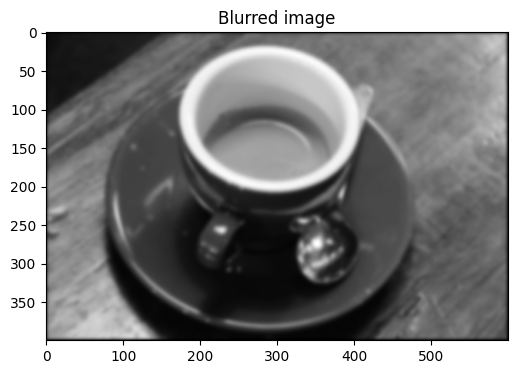

In [3]:
Z = blur(X)
imshow(Z, cmap="gray")
title("Blurred image");

Now we imagine that $\mathbf{X}$ is unknown and that we want to recover it from $\mathbf{Z}$. We first need functions that translate between vector and matrix representations.

In [4]:
from scipy.sparse.linalg import LinearOperator
vec = lambda Z: Z.reshape(m * n)
unvec = lambda z: z.reshape(m, n)
xform = lambda x: vec(blur(unvec(x)))

```{index} ! Python; LinearOperator
```

Now we declare the three-step blur transformation as a `LinearOperator`, supplying also the size of the vector form of an image.

In [5]:
T = LinearOperator((m * n, m * n), matvec=xform)

The blurring operators are symmetric, so we apply `minres` to the composite blurring transformation `T`.

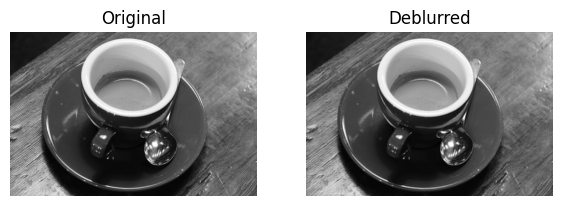

In [6]:
from scipy.sparse.linalg import gmres
y, flag = gmres(T, vec(Z), rtol=1e-5, maxiter=50)
Y = unvec(maximum(0, minimum(1, y)))


subplot(1, 2, 1),  imshow(X, cmap="gray")
axis("off"),  title("Original")
subplot(1, 2, 2),  imshow(Y, cmap="gray")
axis("off"),  title("Deblurred");